In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.1MB/s 
     |████████████████████████████████| 9.5MB 15.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Rajasthan1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,-18,14.736618,985.312622,8.545349,109.345042,0
131396,2014,12,31,20,0,0,0,0,0,0,0,-18,13.804154,986.000549,8.901171,122.334315,0
131397,2014,12,31,21,0,0,0,0,0,0,0,-18,12.933973,986.018555,9.348792,135.562509,0
131398,2014,12,31,22,0,0,0,0,0,0,0,-18,12.142112,985.832092,9.821783,148.928152,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,-11,11.136730,984.379272,19.563755,116.428208,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,-10,10.646979,985.168579,21.357848,103.583783,0,2000-01-01 06:00:00
7,2000,1,1,7,0,0,0,0,0,0,0,-9,11.265209,985.925598,22.168916,91.181648,0,2000-01-01 07:00:00
8,2000,1,1,8,0,78,306,135,74,354,139,-8,14.277325,986.486450,20.120814,79.450627,0,2000-01-01 08:00:00
9,2000,1,1,9,0,114,597,331,121,600,339,-6,17.677278,986.856323,18.365240,68.755938,0,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [8]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,420.4
2000-01-02,418.5
2000-01-03,423.3
2000-01-04,421.2
2000-01-05,418.1
...,...
2014-12-27,392.9
2014-12-28,398.0
2014-12-29,394.4


In [9]:
y_w=y.resample('W-FRI').mean()
y_w

,GHI
Date,
2000-01-07,420.585714
2000-01-14,412.871429
2000-01-21,441.300000
2000-01-28,467.642857
2000-02-04,464.128571
...,...
2014-12-05,421.871429
2014-12-12,410.628571
2014-12-19,386.057143


In [10]:
y_w[:'2011']

,GHI
Date,
2000-01-07,420.585714
2000-01-14,412.871429
2000-01-21,441.300000
2000-01-28,467.642857
2000-02-04,464.128571
...,...
2011-12-02,402.771429
2011-12-09,410.542857
2011-12-16,398.057143


In [34]:
y_w['2012':]

,GHI
Date,
2012-01-06,406.128571
2012-01-13,411.528571
2012-01-20,432.585714
2012-01-27,412.128571
2012-02-03,464.085714
...,...
2014-12-05,421.871429
2014-12-12,410.628571
2014-12-19,386.057143


In [11]:
y[:4382]

,GHI
Date,
2000-01-01,420.4
2000-01-02,418.5
2000-01-03,423.3
2000-01-04,421.2
2000-01-05,418.1
...,...
2011-12-29,406.8
2011-12-30,406.8
2011-12-31,406.7


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
type(y)

pandas.core.frame.DataFrame

In [14]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values
for i in range(0,5474,7):
  X_add = y[i:i+7]
  X_T.append(X_add)
X_T=np.asarray(X_T)
X_T.shape

(782, 7)

In [15]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(783,)

In [16]:
type(X_T[:626])

numpy.ndarray

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=7))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_T[:626], Y_T[:626], epochs=2000, verbose=0)

In [18]:
# demonstrate prediction
yhat=[]

for i in range(626,782):
  x_input = X_T[i]
  x_input = x_input.reshape((1, 7))
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[406.20605]]
[[411.42578]]
[[435.94208]]
[[415.9283]]
[[467.70822]]
[[486.02197]]
[[512.887]]
[[556.2858]]
[[557.59]]
[[564.59863]]
[[602.4351]]
[[620.1466]]
[[626.8438]]
[[622.52637]]
[[626.85895]]
[[609.74]]
[[651.95624]]
[[676.043]]
[[693.6174]]
[[689.09595]]
[[704.68823]]
[[693.8018]]
[[661.13403]]
[[645.0178]]
[[690.8009]]
[[681.59796]]
[[639.6514]]
[[530.24524]]
[[629.8193]]
[[619.67285]]
[[624.7164]]
[[541.5429]]
[[502.6722]]
[[517.24445]]
[[597.63525]]
[[433.14932]]
[[503.7298]]
[[605.9898]]
[[599.83704]]
[[580.1295]]
[[564.6271]]
[[530.38525]]
[[506.8603]]
[[493.09576]]
[[471.9395]]
[[448.1641]]
[[427.5367]]
[[413.14465]]
[[405.84814]]
[[371.55072]]
[[404.73816]]
[[409.9874]]
[[403.67236]]
[[425.6427]]
[[415.63577]]
[[463.72012]]
[[418.1989]]
[[479.59485]]
[[503.15805]]
[[551.7162]]
[[568.21906]]
[[594.7169]]
[[613.2466]]
[[636.71185]]
[[608.4889]]
[[651.3681]]
[[651.2599]]
[[645.52124]]
[[637.8701]]
[[682.5064]]
[[664.45734]]
[[696.3935]]
[[707.41473]]
[[709.4304]]
[[706.026

[array([[406.20605]], dtype=float32),
 array([[411.42578]], dtype=float32),
 array([[435.94208]], dtype=float32),
 array([[415.9283]], dtype=float32),
 array([[467.70822]], dtype=float32),
 array([[486.02197]], dtype=float32),
 array([[512.887]], dtype=float32),
 array([[556.2858]], dtype=float32),
 array([[557.59]], dtype=float32),
 array([[564.59863]], dtype=float32),
 array([[602.4351]], dtype=float32),
 array([[620.1466]], dtype=float32),
 array([[626.8438]], dtype=float32),
 array([[622.52637]], dtype=float32),
 array([[626.85895]], dtype=float32),
 array([[609.74]], dtype=float32),
 array([[651.95624]], dtype=float32),
 array([[676.043]], dtype=float32),
 array([[693.6174]], dtype=float32),
 array([[689.09595]], dtype=float32),
 array([[704.68823]], dtype=float32),
 array([[693.8018]], dtype=float32),
 array([[661.13403]], dtype=float32),
 array([[645.0178]], dtype=float32),
 array([[690.8009]], dtype=float32),
 array([[681.59796]], dtype=float32),
 array([[639.6514]], dtype=floa

In [19]:
y_w[626:-2].index

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2014-10-17', '2014-10-24', '2014-10-31', '2014-11-07',
               '2014-11-14', '2014-11-21', '2014-11-28', '2014-12-05',
               '2014-12-12', '2014-12-19'],
              dtype='datetime64[ns]', name='Date', length=155, freq='W-FRI')

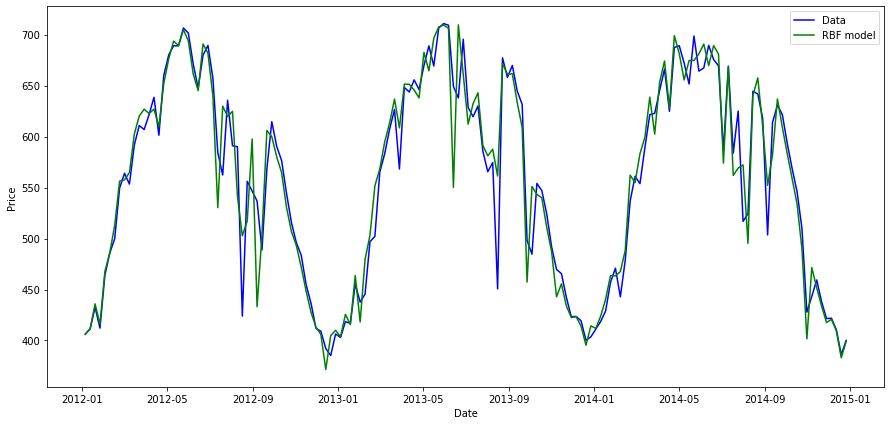

In [20]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
X_train = y_w[:'2011']
X_test = y_w['2012':]

In [22]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(X_train, start_p=0, start_q=0,max_p=1,max_d=1,max_q=1, m=52,start_P=0,start_Q=0,max_P=1,max_D=1,max_Q=1, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=6248.340, Time=2.45 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=6007.840, Time=6.80 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=29.20 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=6148.548, Time=0.90 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=26.73 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=18.78 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=6114.112, Time=5.28 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=inf, Time=21.31 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=inf, Time=19.55 sec
 ARIMA(1,1,0)(1,1,0)[52] intercept   : AIC=6009.840, Time=20.86 sec

Best model:  ARIMA(1,1,0)(1,1,0)[52]          
Total fit time: 151.888 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  626
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -3000.920
Date:                            Thu, 27 May 2021   AIC                           6007.840
Time:                                    15:10:28   BIC                           6020.893
Sample:                                         0   HQIC                          6012.932
                                            - 626                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4147      0.023    -18.147      0.000      -0.459      -0.370
ar.S.L52      -0.4860      0.025    -19.393      0.000      -0.535      -0.437
sigma2      2022.2746     73.568     27.488      0.000    1878.084    2166.466
===================================================================================
Ljung-Box (L1) (Q):                   7.38   Jarque-Bera (JB):               262.53
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.18
Prob(H) (two-sided):                  0.76   Kurtosis:                         6.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
Fdates= pd.date_range('2012-01-06','2017-01-01' , freq='1W-FRI')
Fdates

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2016-10-28', '2016-11-04', '2016-11-11', '2016-11-18',
               '2016-11-25', '2016-12-02', '2016-12-09', '2016-12-16',
               '2016-12-23', '2016-12-30'],
              dtype='datetime64[ns]', length=261, freq='W-FRI')

In [52]:
stepwise_model.fit(X_train)
pred=stepwise_model.predict(n_periods=156)
pred

array([412.99388463, 429.00904518, 451.79354678, 471.97487129,
       490.77528237, 472.43814639, 490.46580445, 556.57047958,
       544.42771669, 593.38428696, 627.80466637, 645.42308621,
       660.46478781, 622.70026982, 649.78180373, 683.33587887,
       695.77204874, 682.35635252, 684.5197332 , 699.21822786,
       697.25564882, 678.6014756 , 625.17086675, 669.36895081,
       680.03715753, 668.76799218, 603.43267336, 620.23538684,
       617.40353679, 574.26136099, 598.38584173, 579.91670278,
       551.61975957, 583.87681   , 569.16757624, 508.50159311,
       562.146967  , 604.41192811, 612.07306262, 594.11695762,
       556.65235566, 537.04993136, 488.12436523, 464.41934099,
       433.97409652, 433.59575022, 397.88748566, 413.87881177,
       415.98490554, 404.10321592, 403.20773311, 403.86887686,
       421.1118878 , 434.91186607, 451.94136568, 471.25002927,
       490.071069  , 488.650786  , 469.35432931, 556.89613656,
       541.24720768, 599.95870743, 631.10606076, 645.90

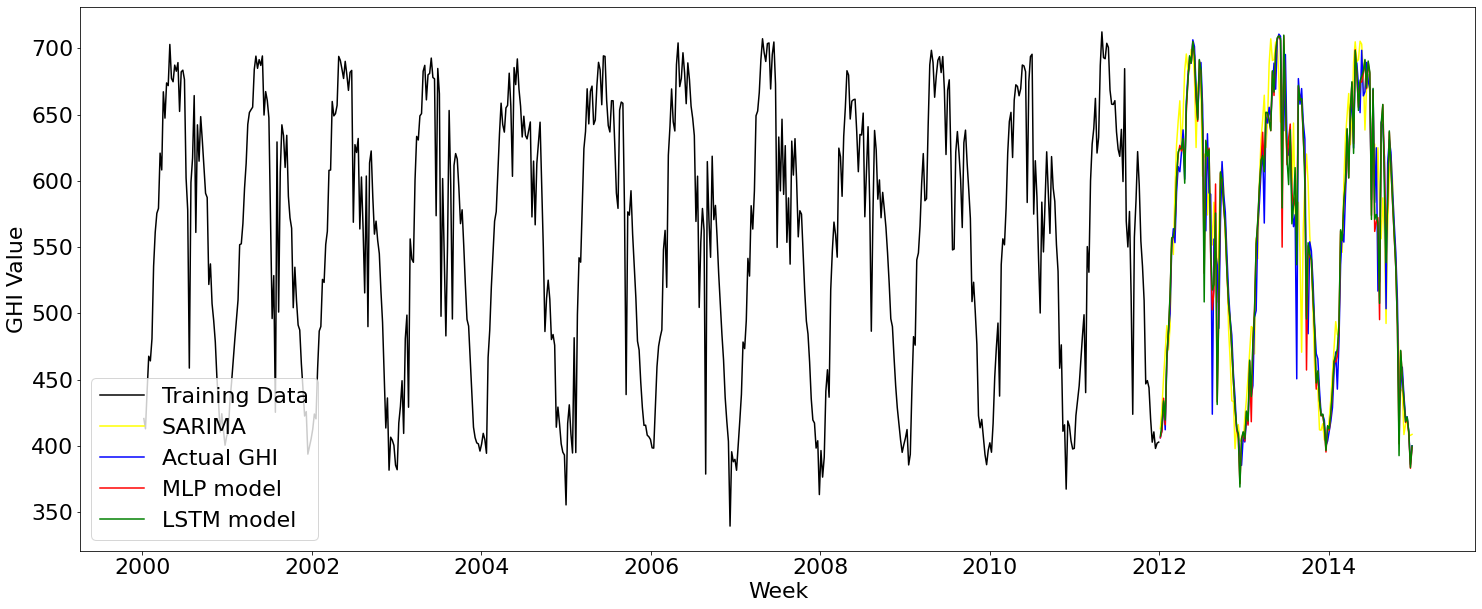

In [54]:

plt.rcParams.update({'font.size': 22})

LSTM = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/LSTMweekly.csv')

plt.figure(figsize = (25,10))
plt.plot(y_w[:'2011'].index, y_w[:'2011'], color= 'black', label= 'Training Data')
plt.plot(y_w[626:-1].index, pred, color= 'yellow', label= 'SARIMA')
#plt.plot(Fdates, pred, color= 'yellow', label= 'SARIMA model')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Actual GHI')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'red', label= 'MLP model') 
plt.plot(y_w[626:-1].index, LSTM['GHI'], color= 'green', label= 'LSTM model')
plt.xlabel('Week')
plt.ylabel('GHI Value')
plt.legend()
plt.show()

ValueError: ignored

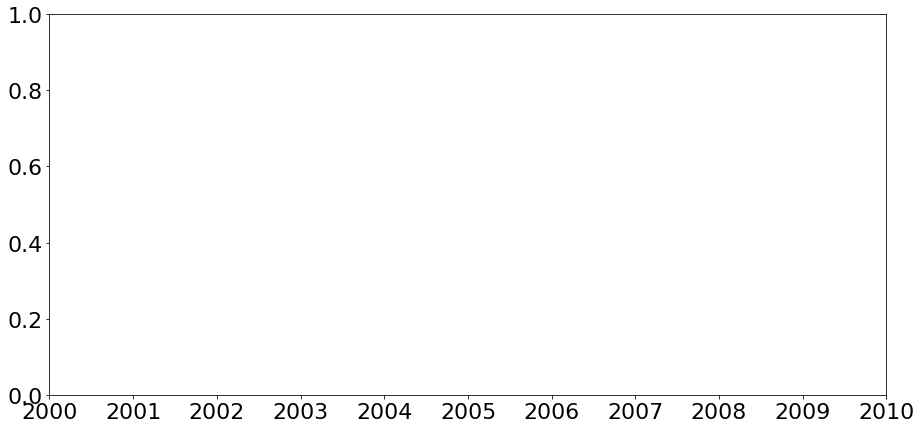

In [29]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, pred, color= 'red', label= 'SARIMA')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'MLP model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
hybrid=pd.DataFrame(columns=['Values','Model'])
for i in range (156):
  if abs(yhat[i]-y_w.iloc[626+i]['GHI'])<abs(pred[i]-y_w.iloc[626+i]['GHI']):
    hybrid.loc[i]=[yhat[i][0][0],-1]
  else:
    hybrid.loc[i]=[pred[i],1]
hybrid

,Values,Model
0,406.984924,-1.0
1,409.292419,-1.0
2,438.077179,-1.0
3,411.540253,-1.0
4,468.658875,-1.0
...,...,...
151,418.789703,-1.0
152,420.726257,-1.0
153,410.269806,-1.0
154,387.660248,-1.0


In [ ]:
letsSee=[0]*52
for i in range(0,156,52):
  for j in range(i,i+52):
    letsSee[j-i]+=hybrid['Model'][j]
letsSee

In [ ]:
modelPref=[]
for a in letsSee:
  if a>0:
    modelPref.append('SARIMA')
  else:
    modelPref.append('MLP')
modelPref

['MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'SARIMA',
 'SARIMA',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'SARIMA',
 'SARIMA',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'SARIMA',
 'MLP',
 'MLP',
 'SARIMA',
 'SARIMA',
 'SARIMA',
 'MLP',
 'SARIMA',
 'MLP',
 'MLP',
 'MLP',
 'SARIMA',
 'MLP',
 'MLP',
 'SARIMA',
 'SARIMA',
 'SARIMA',
 'SARIMA',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'MLP',
 'SARIMA']

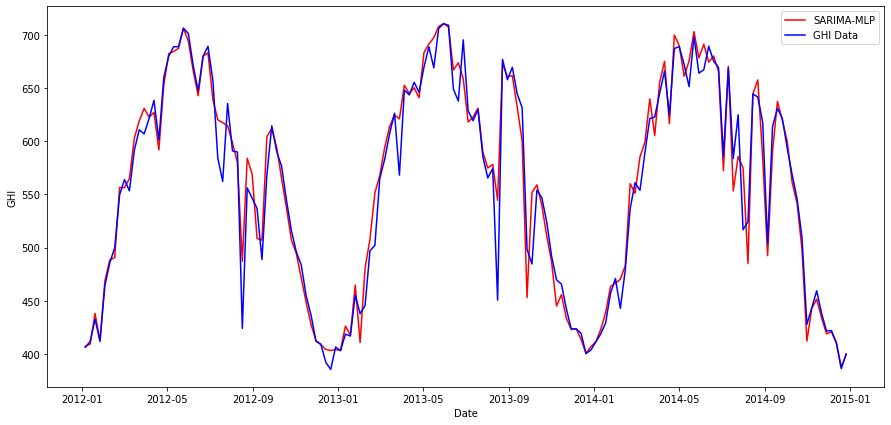

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, hybrid['Values'], color= 'red', label= 'SARIMA-MLP')
#plt.scatter(y_w[626:678].index, hybrid['Model'][:52], color= 'red', label= 'hybrid1',marker='+')
#plt.scatter(y_w[626:678].index, hybrid['Model'][52:104], color= 'blue', label= 'hybrid2',marker='|',s=hybrid['Model'][52:104]*50)
#plt.scatter(y_w[626:678].index, hybrid['Model'][104:156], color= 'green', label= 'hybrid3',marker='_')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'GHI Data')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

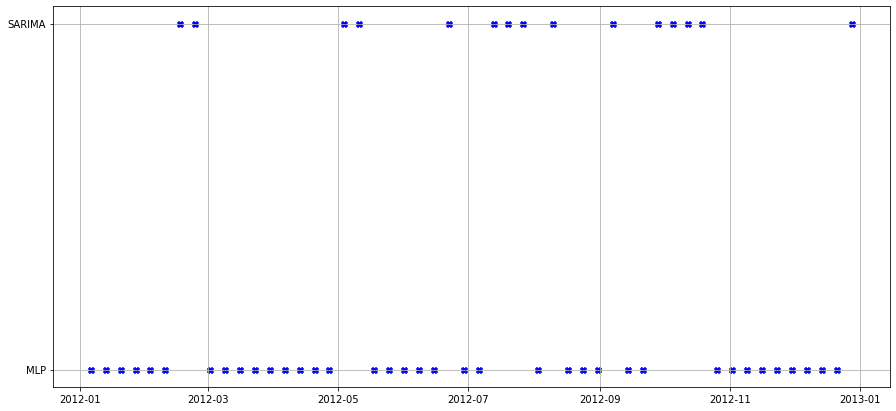

In [ ]:
plt.figure(figsize = (15,7))
plt.scatter(y_w[626:678].index, modelPref, color= 'blue', label= 'GHI Data',marker='X')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False))
print(mean_squared_error(y_w[626:-1],pred,squared=False))
print(mean_squared_error(y_w[626:-1],hybrid['Values'],squared=False))

26.402638521691983
42.80280288331904
19.77044673273496


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,)))
print(mean_absolute_percentage_error(y_w[626:-1],pred))
print(mean_absolute_percentage_error(y_w[626:-1],hybrid['Values']))

0.03112884862247945
0.05520757061889379
0.02368627166249432
